# Numerical Integration and Differentiation

In [1]:
import types

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from scipy import integrate

## Numerical Quadrature Rule

An n-point quadrature formula has the form:

$$I(f)=\int\limits_{a}^{b}f(x)\,dx=\sum_{i=1}^{n} w_if(x_i)+R_n$$

## Newton-Cotes Quadrature

Interpolating the function value at the midpoint of the interval by a constant (i.e., a
polynomial of degree zero) gives a one-point quadrature rule known as the midpoint rule
or rectangle rule:

In [5]:
def midpoint(f,x:np.ndarray=None,bounds:tuple=None,Nsample:int=None):

    if x is None:
        x = np.linspace(*bounds,Nsample)

    xmids = (x[1:]+x[:-1])/2

    if isinstance(f,types.FunctionType):
        ymids = f(xmids)
    else:
        ymids = (f[1:]+f[:-1])/2

    xdiff = (x[1:]-x[:-1])

    return np.sum(ymids*xdiff)

Interpolating the function values at the two endpoints of the interval by a straight line
(i.e., a polynomial of degree one) gives a two-point quadrature rule known as the trapezoid
rule:

In [6]:
def trapezoid(f,x:np.ndarray=None,bounds:tuple=None,Nsample:int=None):

    if x is None:
        x = np.linspace(*bounds,Nsample)

    if isinstance(f,types.FunctionType):
        y = f(x)
    else:
        y = f

    xdiff = (x[1:]-x[:-1])
    yavrg = (y[1:]+y[:-1])/2

    return np.sum(yavrg*xdiff)

Interpolating the function values at three points (the two endpoints and the midpoint)
by a quadratic polynomial gives a three-point quadrature rule known as Simpson's rule:

In [7]:
def simpson(f,x:np.ndarray=None,bounds:tuple=None,Nsample:int=None):

    xbnds = np.linspace(*bounds,Nsample) if x is None else x
    
    xmids = (xbnds[1:]+xbnds[:-1])/2

    if isinstance(f,types.FunctionType):
        ybnds = f(xbnds)
        ymids = f(xmids)
    else:
        ybnds = f
        ymids = (f[1:]+f[:-1])/2

    xdiff = (xbnds[1:]-xbnds[:-1])

    I1 = ybnds[:-1]*xdiff/6
    I2 = ymids*4*xdiff/6
    I3 = ybnds[1:]*xdiff/6

    return np.sum(I1)+np.sum(I2)+np.sum(I3)

Example 1:

In [8]:
f = lambda x: 1/(1+x**2)

In [17]:
I = np.arctan(2)-np.arctan(1); I

np.float64(0.32175055439664213)

In [9]:
bounds = (1,2)

In [10]:
Nsample = 100

In [11]:
midpoint(f,bounds=bounds,Nsample=Nsample)

np.float64(0.32174910896298947)

In [19]:
In = trapezoid(f,bounds=bounds,Nsample=Nsample)

In [20]:
x = np.linspace(1,2,100)
Is = integrate.trapezoid(f(x),x)

In [22]:
print(f"SciPy.Integrate.Trapezoid gives {Is} and Trapezoid from scratch gives {In}")

SciPy.Integrate.Trapezoid gives 0.3217534452614496 and Trapezoid from scratch gives 0.3217534452614496


In [23]:
In = simpson(f,bounds=bounds,Nsample=Nsample)

In [24]:
x = np.linspace(1,2,100)
Is = integrate.simpson(f(x),x=x)

In [25]:
print(f"SciPy.Integrate.Simpson gives {Is} and mySimpson gives {In}")

SciPy.Integrate.Simpson gives 0.32175055428200283 and mySimpson gives 0.3217505543958095


In [15]:
integrate.quad(f,1,2) # General purpose integration.

(0.3217505543966422, 3.572148736770611e-15)

## Gaussian Quadrature Rules

Newton-Cotes quadrature rules are simple and often eective, but they have a number of
drawbacks:
- The use of a large number of equally spaced nodes in a high-order Newton-Cotes rule
may incur the erratic behavior and unsatisfactory results often associated with highdegree
polynomial interpolation. For example, some of the weights for a high-order rule
may be negative, potentially leading to catastrophic cancellation in the summation.
- Closed Newton-Cotes rules require evaluation of the integrand function at the endpoints
of the interval, where singularities often lie.
- In general, Newton-Cotes rules are not of the highest polynomial degree possible for the
number of nodes used.

These drawbacks are largely overcome by Gaussian quadrature rules. Gaussian rules are
based on polynomial interpolation, but the nodes are not equally spaced within the interval.
Instead, the locations of the nodes are chosen to maximize the polynomial degree of the
resulting rule. In particular, the nodes tend to be bunched near the endpoints but do
not include the endpoints themselves. These two properties avoid both singularities at
the endpoints and unwanted oscillation in the polynomial interpolant, keeping the weights
positive and of reasonable magnitude.

## Composite Quadrature Rules

It is not feasible to use arbitrarily high-order quadrature rules in an attempt to attain
arbitrarily high accuracy in evaluating an integral over a given interval. A much better
alternative is to subdivide the original interval into subintervals, often called panels in this
context, then apply a lower-order quadrature rule in each panel. Summing all of these
partial results then yields an approximation to the overall integral.

## Adaptive Quadrature

A composite quadrature rule with an error estimate can be used to produce an automatic
quadrature procedure: simply continue to subdivide all of the panels, say, by half, until the
overall error estimate falls below the required tolerance. This approach usually works, but
it may require substantially more work than methods tailored for the particular problem.
A more intelligent approach is adaptive quadrature, in which the domain of integration is
selectively refined to reflect the behavior of the particular integrand function.

## Integration Problems

### Integrating Tabular Data

Thus far we have assumed that the integrand function can be evaluated at any desired
point within the interval of integration. This assumption may not be valid if the integrand is
dfined only by a table of its values at selected points. A reasonable approach to integrating
such tabular data is by piecewise interpolation. For example, integrating the piecewise linear
interpolant to tabular data gives a composite trapezoid rule.

Exercise 2:

In [27]:
x = np.array([0,1.1,2.5,3.1,4.3,5.6,5.9,7.2,7.8,7.9,8.3,8.9,9.3,9.6,10.])
y = np.array([0.5,0.691,0.845,0.880,0.896,0.846,0.826,0.714,0.652,0.642,0.598,0.533,0.489,0.457,0.414])

It = integrate.trapezoid(y,x=x)
Is = integrate.simpson(y,x=x)

print(It,Is)

7.27975 7.315620891608392


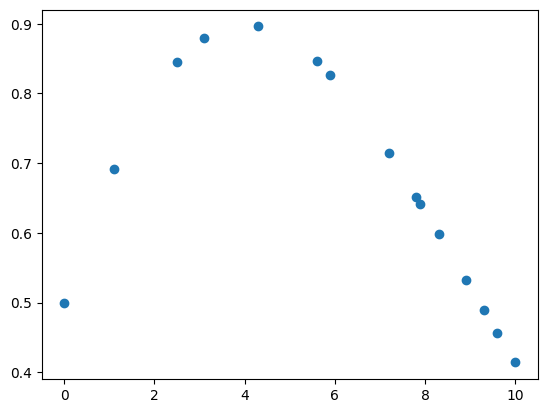

In [28]:
plt.scatter(x,y)
plt.show()

### Infinite Intervals

Although some quadrature routines are capable of handling integrals over infinite or semi-in
finite intervals, one may also be able to deal adequately with such problems using standard
quadrature routines for finite intervals. A number of approaches are possible:
- Replace the infinite limits of integration by finite values. Such finite limits should be
chosen carefully so that any omitted tail is negligible or its contribution is estimated,
if possible. But the remaining finite interval should not be so wide that an automatic
quadrature routine will be fooled into sampling badly.
- Transform the variable of integration so that the new interval is finite. Typical transformations
include x = -log t or x = t/(1 - t). Care must be taken not to introduce
singularities or other dificulties by such a transformation.
- Apply a quadrature rule, such as Gauss-Laguerre or Gauss-Hermite, designed for an
infinite interval.

### Double Integrals

To evaluate a double integral, a number of approaches are available, including the following:
- Use an automatic one-dimensional quadrature routine for each dimension, one for the
outer integral and the other for the inner integral. Each time the outer routine calls
its integrand function, the latter will call the inner quadrature routine. This approach
requires some care in setting the error tolerances for the respective quadrature routines.
- Use a product quadrature rule, which results from applying a one-dimensional rule to
successive dimensions. This approach is limited to standard domains, such as rectangles.
- Use a nonproduct quadrature rule. In recent years, such rules, including error estimates,
have become available. The most important case for automatic adaptive use is for triangles,
since many two-dimensional regions can be efficiently triangulated to any desired
degree of refinement.

## Numerical Differentiation